In [74]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [75]:
data = pd.read_csv('../Datasets/Ice Cream Sales - temperatures.csv')
data.head()

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


In [76]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        365 non-null    int64  
 1   Ice Cream Profits  365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.8 KB


Index(['Temperature', 'Ice Cream Profits'], dtype='object')

In [77]:
predict = "Ice Cream Profits"

In [78]:
x = data.drop(columns=[predict]).to_numpy()
y = data[predict].to_numpy()

In [79]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)


In [80]:
# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE
best = 0
for _ in range(8000):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    if acc > best:
        best = acc
        with open("Icecream_price.pickle", "wb") as f:
            pickle.dump(linear, f)
    
print("The best accuracy is",str(best))

Accuracy: 0.9690165739420968
Accuracy: 0.985409394063386
Accuracy: 0.9913720782958788
Accuracy: 0.9736612332043703
Accuracy: 0.975263911107165
Accuracy: 0.967403296299164
Accuracy: 0.9810624483646715
Accuracy: 0.9772996498880766
Accuracy: 0.9849123829870698
Accuracy: 0.9699190102312134
Accuracy: 0.9808341246544837
Accuracy: 0.9803997491546991
Accuracy: 0.9728415916710265
Accuracy: 0.9739123481671327
Accuracy: 0.973634167596898
Accuracy: 0.974555090464062
Accuracy: 0.9923076886034111
Accuracy: 0.9738988372854898
Accuracy: 0.9829233667131578
Accuracy: 0.9742528210328767
Accuracy: 0.9645456309013339
Accuracy: 0.9582454430645999
Accuracy: 0.9717799532151679
Accuracy: 0.9610891518453664
Accuracy: 0.9739205454375718
Accuracy: 0.9767384656745011
Accuracy: 0.9847089604144161
Accuracy: 0.979361273247407
Accuracy: 0.9865011580979177
Accuracy: 0.9755007215819759
Accuracy: 0.9718773029873495
Accuracy: 0.9770675576878789
Accuracy: 0.9652767223792624
Accuracy: 0.9558368983389315
Accuracy: 0.96918086

In [81]:
# LOAD MODEL
pickle_in = open("Icecream_price.pickle", "rb")
linear = pickle.load(pickle_in)


In [82]:
predicted= linear.predict(x_test)
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])


75.96500274831855 [92] 78.2
75.96500274831855 [92] 77.41
42.571811568744735 [64] 44.1
53.30533730503632 [73] 54.67
65.23147701202697 [83] 62.58
25.875215978957826 [50] 27.64
46.149653480841934 [67] 46.04
49.72749539293912 [70] 48.82
43.764425539443806 [65] 42.72
74.77238877761948 [91] 75.58
54.49795127573539 [74] 53.62
66.42409098272603 [84] 66.61
78.35023068971668 [94] 75.7
53.30533730503632 [73] 52.42
80.73545863111481 [96] 82.83
75.96500274831855 [92] 75.6
59.268407158531645 [78] 58.13
56.88317921713352 [76] 59.41
62.84624907062884 [81] 64.23
35.41612774455035 [58] 36.79
44.95703951014286 [66] 51.75
53.30533730503632 [73] 54.08
78.35023068971668 [94] 80.94
67.6167049534251 [85] 61.82
58.07579318783257 [77] 58.72
86.69852848461014 [101] 81.91
62.84624907062884 [81] 58.11
30.64567186175408 [54] 29.75
25.875215978957826 [50] 27.31
67.6167049534251 [85] 70.3
54.49795127573539 [74] 57.1
58.07579318783257 [77] 60.75
31.838285832453153 [55] 29.53
74.77238877761948 [91] 81.81
66.42409098272

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


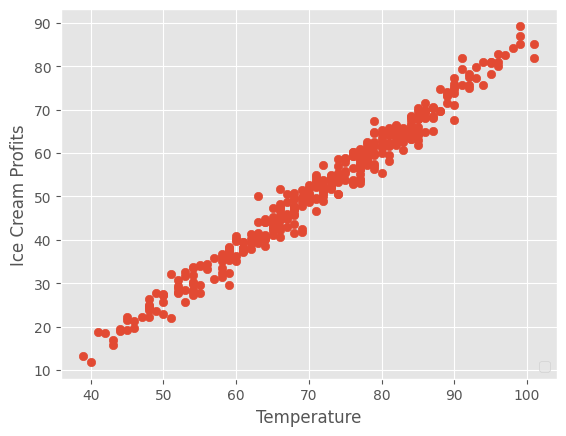

In [83]:
style.use("ggplot")
# Drawing and plotting model
# 'Temperature', 'Ice Cream Profits'
plot = "Temperature"
plt.scatter(data[plot], data["Ice Cream Profits"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Ice Cream Profits")
plt.show()